In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
print('슝=3')

슝=3


In [2]:
import os
csv_path = os.getenv("HOME") +"/aiffel/pokemon_eda/data/Pokemon.csv"
original_data = pd.read_csv(csv_path)
print('슝=3')

슝=3


In [3]:
pokemon = original_data.copy()
print(pokemon.shape)
pokemon.head()

(800, 13)


,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


In [4]:
# 전설의 포켓몬 데이터셋
legendary = pokemon[pokemon["Legendary"] == True].reset_index(drop=True)
print(legendary.shape)
legendary.head()

(65, 13)


,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,144,Articuno,Ice,Flying,580,90,85,100,95,125,85,1,True
1,145,Zapdos,Electric,Flying,580,90,90,85,125,90,100,1,True
2,146,Moltres,Fire,Flying,580,90,100,90,125,85,90,1,True
3,150,Mewtwo,Psychic,NaN,680,106,110,90,154,90,130,1,True
4,150,MewtwoMega Mewtwo X,Psychic,Fighting,780,106,190,100,154,100,130,1,True


In [5]:
#  일반 포켓몬의 데이터셋도 만들어봅시다.
ordinary = pokemon[pokemon["Legendary"] == False].reset_index(drop=True)
print(ordinary.shape)
ordinary.head()

(735, 13)


,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


In [6]:
# 결측치 확인
pokemon.isnull().sum()

#               0
Name            0
Type 1          0
Type 2        386
Total           0
HP              0
Attack          0
Defense         0
Sp. Atk         0
Sp. Def         0
Speed           0
Generation      0
Legendary       0
dtype: int64

In [7]:
# 데이터셋의 전체 컬럼
print(len(pokemon.columns))
pokemon.columns

13


Index(['#', 'Name', 'Type 1', 'Type 2', 'Total', 'HP', 'Attack', 'Defense',
       'Sp. Atk', 'Sp. Def', 'Speed', 'Generation', 'Legendary'],
      dtype='object')

In [8]:
# 총 몇 종류의 # 값이 있는지 확인해 보겠습니다.
len(set(pokemon["#"]))

721

In [9]:
# 같은 # 값을 가지는 포켓몬을 확인해 볼까요?
pokemon[pokemon["#"] == 6]

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
6,6,Charizard,Fire,Flying,534,78,84,78,109,85,100,1,False
7,6,CharizardMega Charizard X,Fire,Dragon,634,78,130,111,130,85,100,1,False
8,6,CharizardMega Charizard Y,Fire,Flying,634,78,104,78,159,115,100,1,False


In [10]:
# Q. 총 몇 종류의 포켓몬 이름이 있는지 확인해봅시다!
len(set(pokemon["Name"]))

800

In [11]:
# 무작위로 두 마리의 포켓몬을 한번 살펴보겠습니다.
pokemon.loc[[6, 10]]

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
6,6,Charizard,Fire,Flying,534,78,84,78,109,85,100,1,False
10,8,Wartortle,Water,NaN,405,59,63,80,65,80,58,1,False


In [12]:
# 각 속성의 종류는 총 몇 가지인지 알아봅시다.
len(list(set(pokemon["Type 1"]))), len(list(set(pokemon["Type 2"])))

(18, 19)

In [13]:
# 각자를 집합으로 만들어 차집합을 확인해 봅시다.
set(pokemon["Type 2"]) - set(pokemon["Type 1"])

{nan}

In [14]:
# 포켓몬들의 모든 Type을 types 변수에 저장하겠습니다.
types = list(set(pokemon["Type 1"]))
print(len(types))
print(types)

18
['Rock', 'Electric', 'Flying', 'Dragon', 'Dark', 'Steel', 'Normal', 'Fighting', 'Psychic', 'Ghost', 'Poison', 'Ground', 'Water', 'Grass', 'Ice', 'Bug', 'Fire', 'Fairy']


In [15]:
# Type을 하나만 가지고 있는 포켓몬은 몇 마리일까요?
pokemon["Type 2"].isna().sum()

386

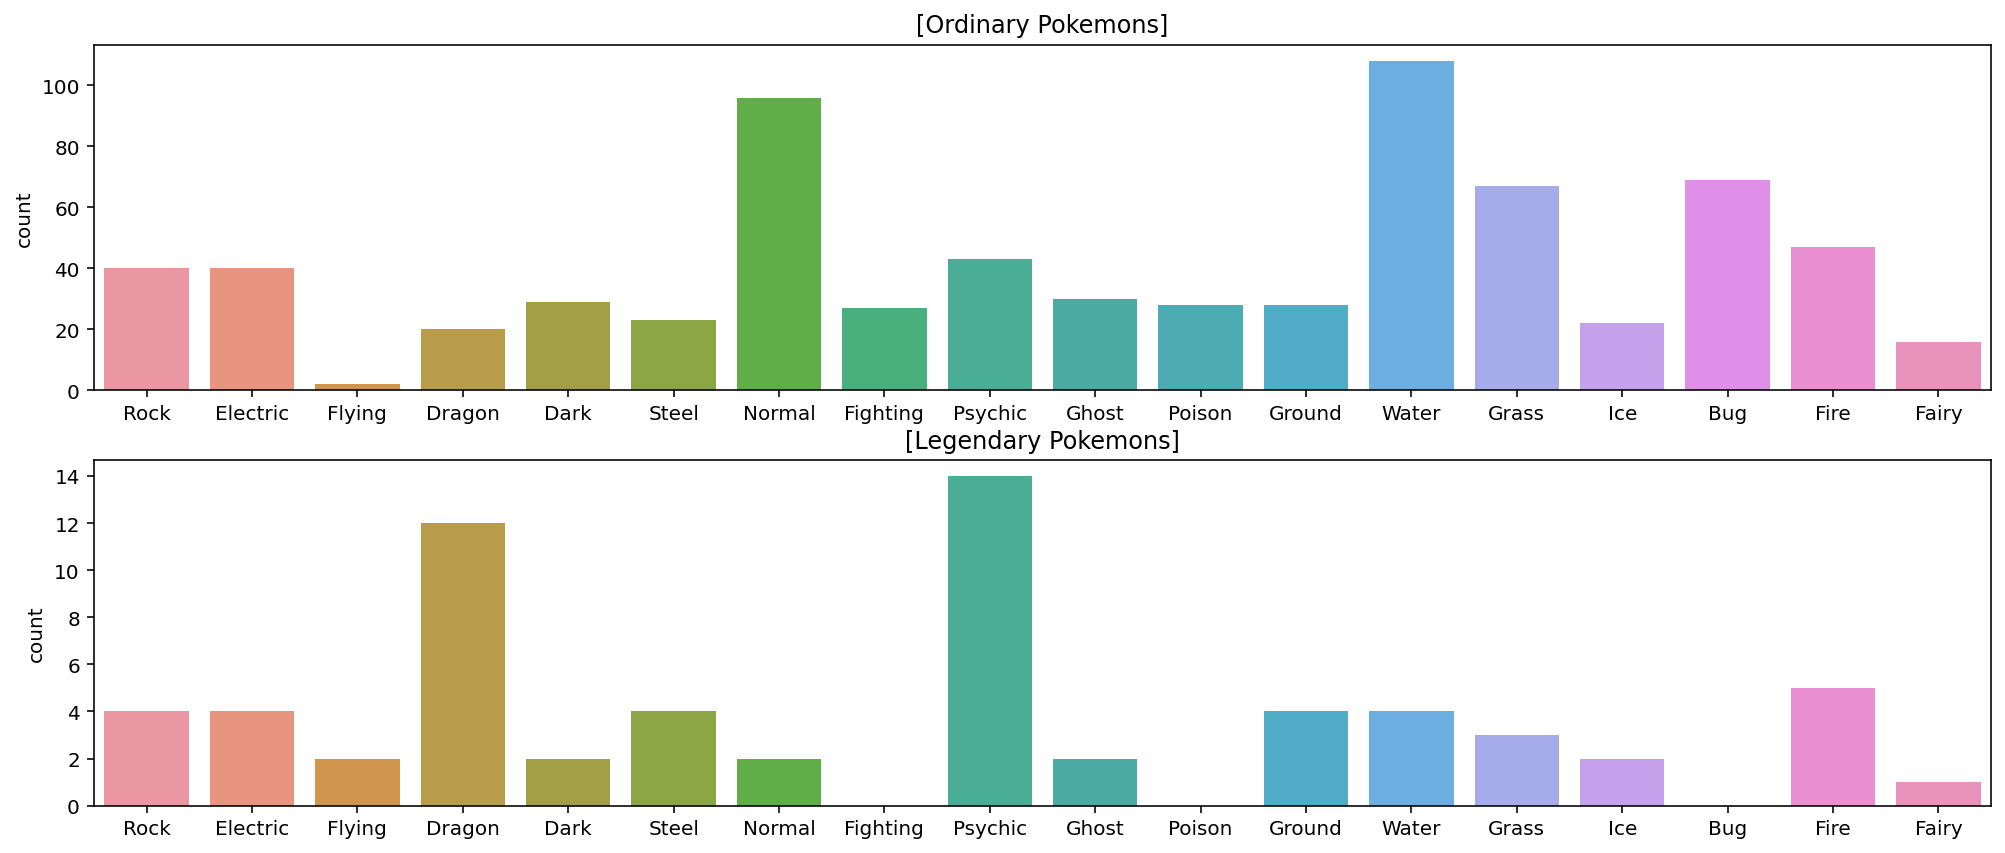

In [18]:
# 다음과 같이 plt의 subplot을 활용해서 두 개의 그래프를 한 번에 그리면서, 그래프는 sns(seaborn)의 countplot을 활용하겠습니다.

plt.figure(figsize=(17, 7))  # 화면 해상도에 따라 그래프 크기를 조정해 주세요.

plt.subplot(211)
sns.countplot(data=ordinary, x="Type 1", order=types).set_xlabel('')
plt.title("[Ordinary Pokemons]")

plt.subplot(212)
sns.countplot(data=legendary, x="Type 1", order=types).set_xlabel('')
plt.title("[Legendary Pokemons]")

plt.show()

In [19]:
# Type1별로 Legendary의 비율을 보여주는 피벗 테이블
pd.pivot_table(pokemon, index="Type 1", values="Legendary").sort_values(by=["Legendary"], ascending=False)

,Legendary
Type 1,
Flying,0.500000
Dragon,0.375000
Psychic,0.245614
Steel,0.148148
Ground,0.125000
Fire,0.096154
Electric,0.090909
Rock,0.090909
Ice,0.083333


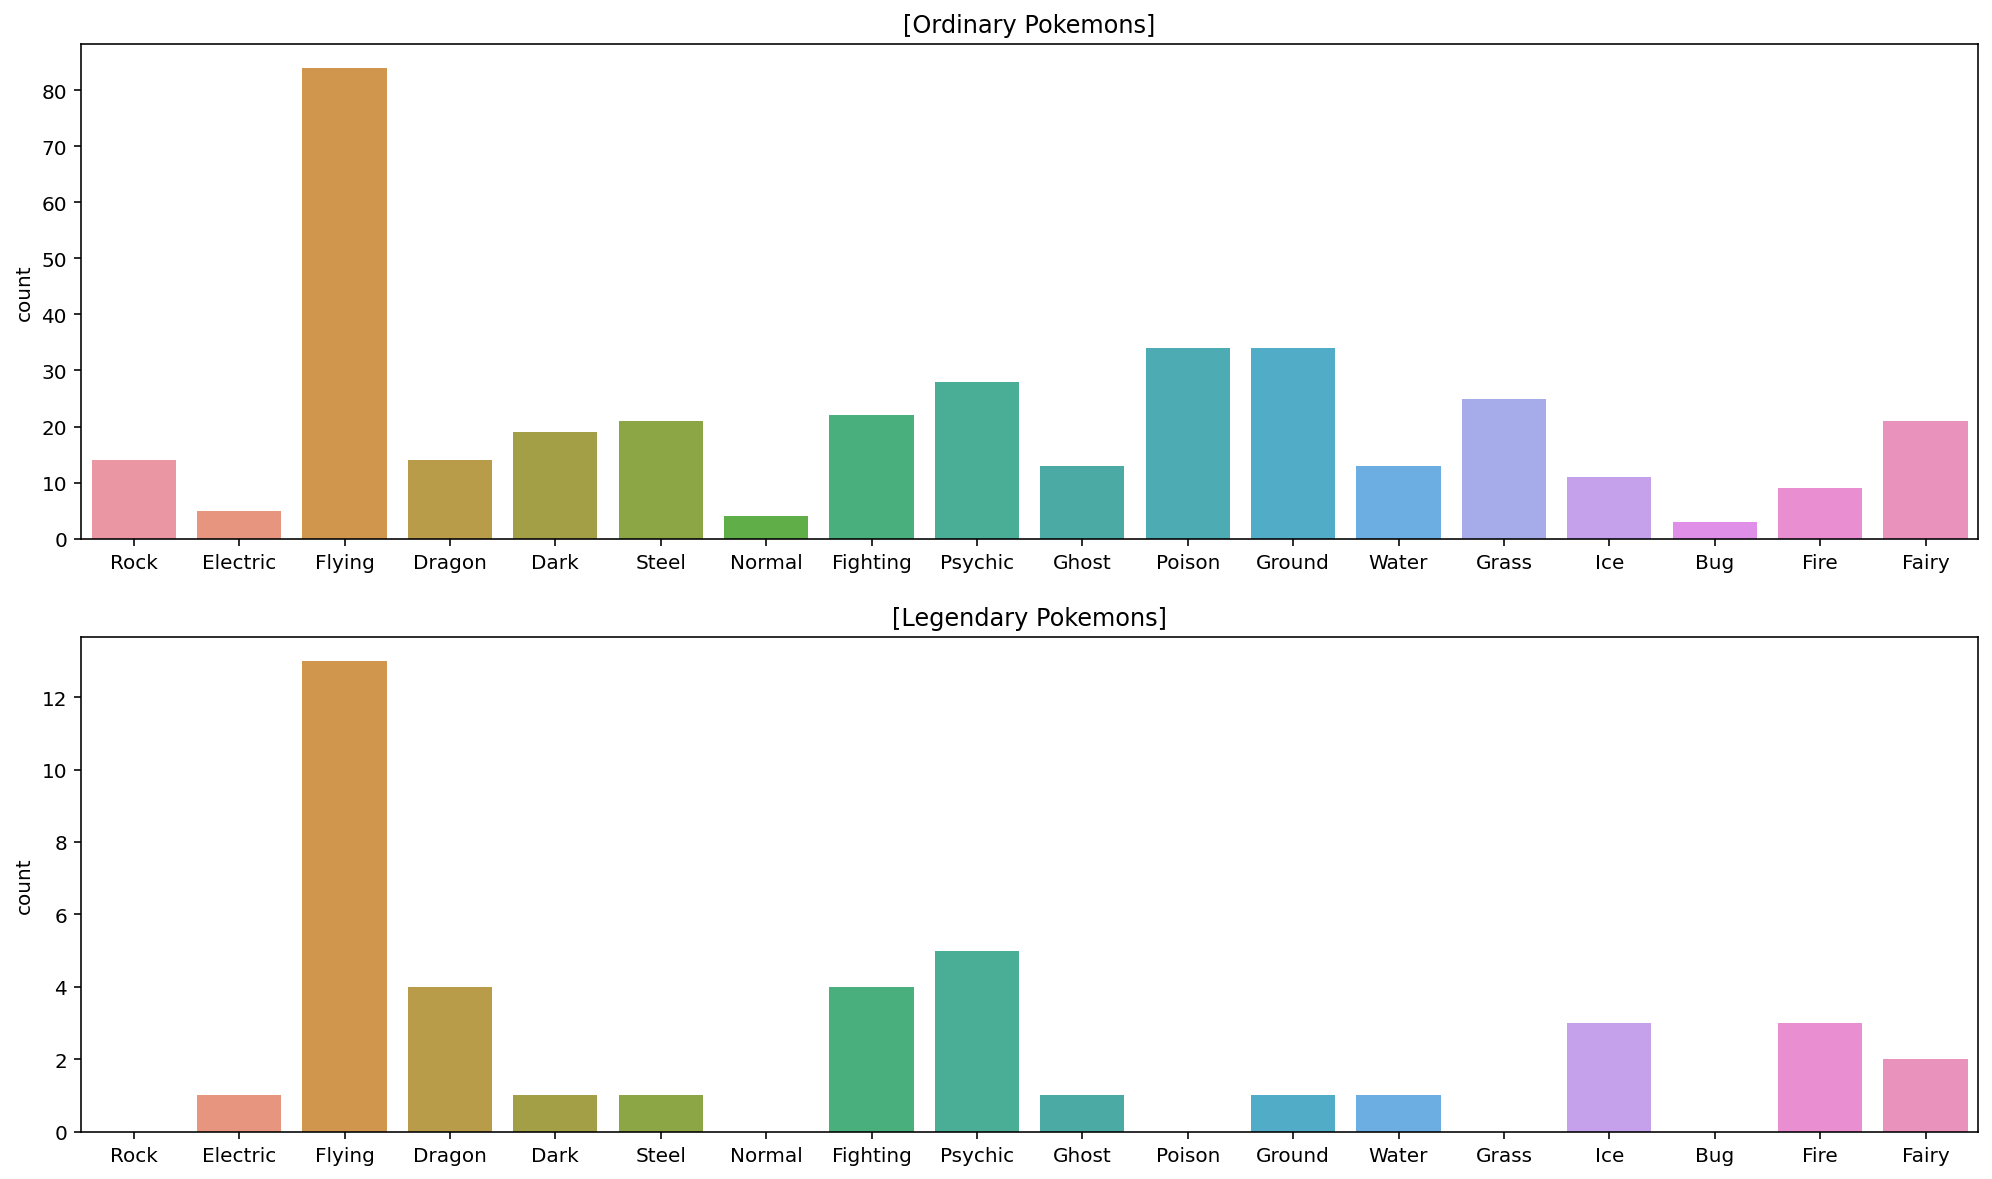

In [20]:
# Type 2 데이터 분포 plot
plt.figure(figsize=(17, 10))  # 화면 해상도에 따라 그래프 크기를 조정해 주세요.

plt.subplot(211)
sns.countplot(data=ordinary, x="Type 2", order=types).set_xlabel('')
plt.title("[Ordinary Pokemons]")

plt.subplot(212)
sns.countplot(data=legendary, x="Type 2", order=types).set_xlabel('')
plt.title("[Legendary Pokemons]")

plt.show()

In [21]:
# Q. Type 2에 대해서도 피벗 테이블을 만들어봅시다.
pd.pivot_table(pokemon, index="Type 2", values="Legendary").sort_values(by=["Legendary"], ascending=False)

,Legendary
Type 2,
Fire,0.250000
Dragon,0.222222
Ice,0.214286
Electric,0.166667
Fighting,0.153846
Psychic,0.151515
Flying,0.134021
Fairy,0.086957
Water,0.071429


In [23]:
# 모든 스탯의 종류를 stats라는 변수에 저장해 보겠습니다.
stats = ["HP", "Attack", "Defense", "Sp. Atk", "Sp. Def", "Speed"]
stats

['HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed']

In [24]:
# 첫 번째 포켓몬에 대해 검증하는 코드입니다.
print("#0 pokemon: ", pokemon.loc[0, "Name"])
print("total: ", int(pokemon.loc[0, "Total"]))
print("stats: ", list(pokemon.loc[0, stats]))
print("sum of all stats: ", sum(list(pokemon.loc[0, stats])))

#0 pokemon:  Bulbasaur
total:  318
stats:  [45, 49, 49, 65, 65, 45]
sum of all stats:  318


In [25]:
# Q. 'pokemon['Total'].values'와 'pokemon[stats].values의 총합'이 같은 포켓몬의 수를 확인해봅시다.

# 각 포켓몬의 stats 열들의 총합과 Total 열 값이 같은지 확인하고, 같으면 1, 다르면 0인 새로운 열을 생성합니다.
pokemon['Stats_Sum_Equal_Total'] = np.where(pokemon[stats].sum(axis=1) == pokemon['Total'], 1, 0)
pokemon

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,Stats_Sum_Equal_Total
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False,1
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False,1
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False,1
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False,1
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,719,Diancie,Rock,Fairy,600,50,100,150,100,150,50,6,True,1
796,719,DiancieMega Diancie,Rock,Fairy,700,50,160,110,160,110,110,6,True,1
797,720,HoopaHoopa Confined,Psychic,Ghost,600,80,110,60,150,130,70,6,True,1
798,720,HoopaHoopa Unbound,Psychic,Dark,680,80,160,60,170,130,80,6,True,1


In [26]:
# 조건을 만족하는 포켓몬의 개수를 확인합니다.
num_pokemon_with_equal_stats_sum_and_total = pokemon['Stats_Sum_Equal_Total'].sum()
print(num_pokemon_with_equal_stats_sum_and_total)

800


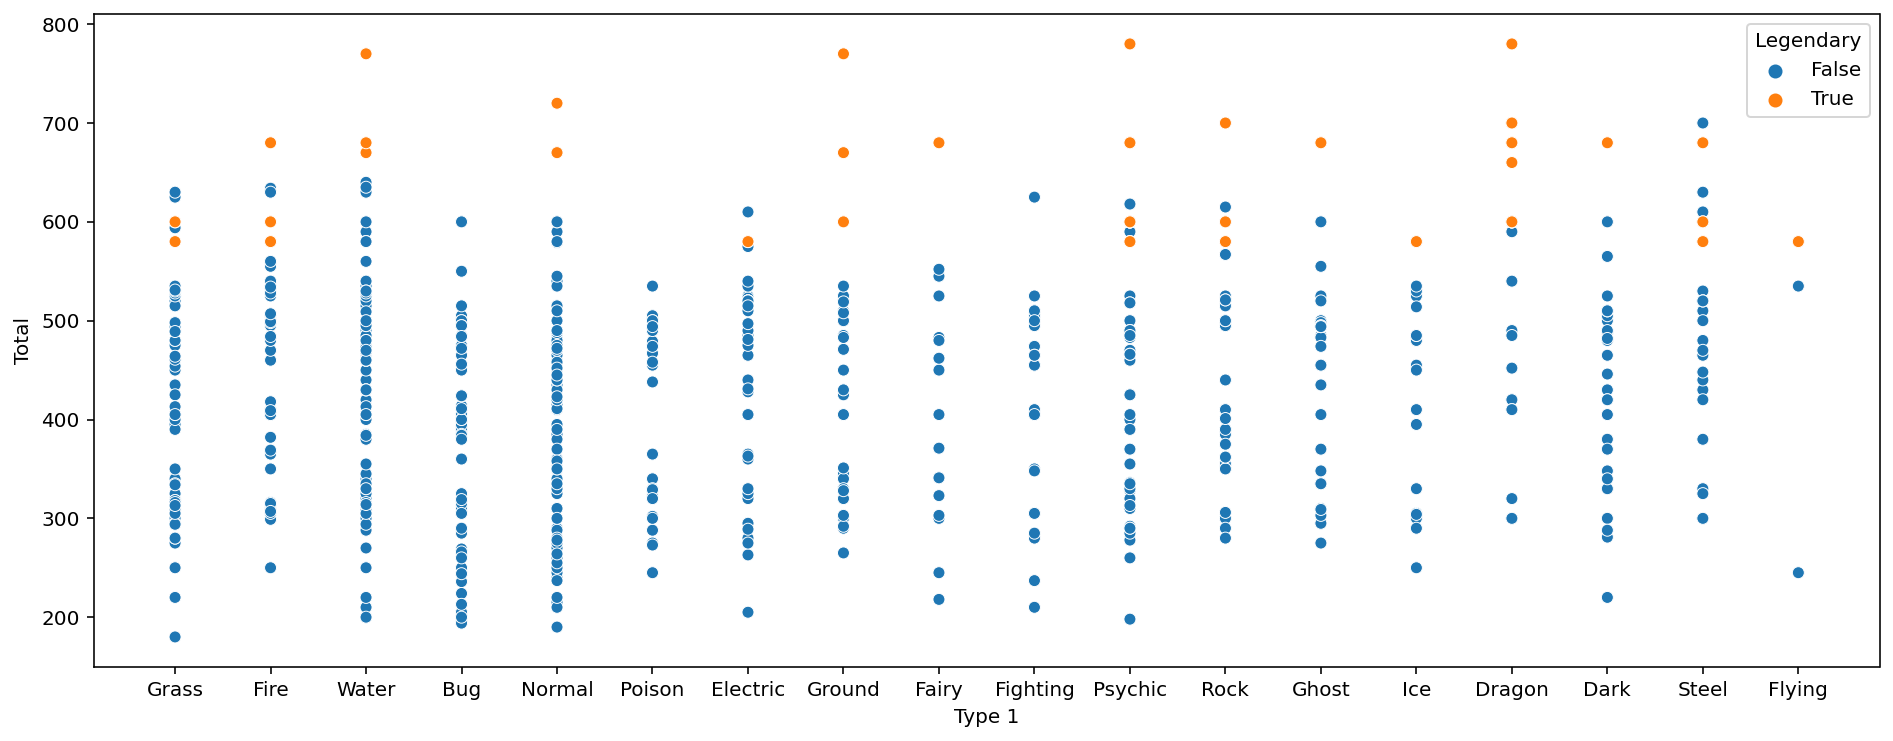

In [27]:
# 그렇다면 Total 값과 Legendary에 따른 분포를 나타냅니다.
fig, ax = plt.subplots()
fig.set_size_inches(16, 6)  # 화면 해상도에 따라 그래프 크기를 조정해 주세요.

sns.scatterplot(data=pokemon, x="Type 1", y="Total", hue="Legendary")
plt.show()

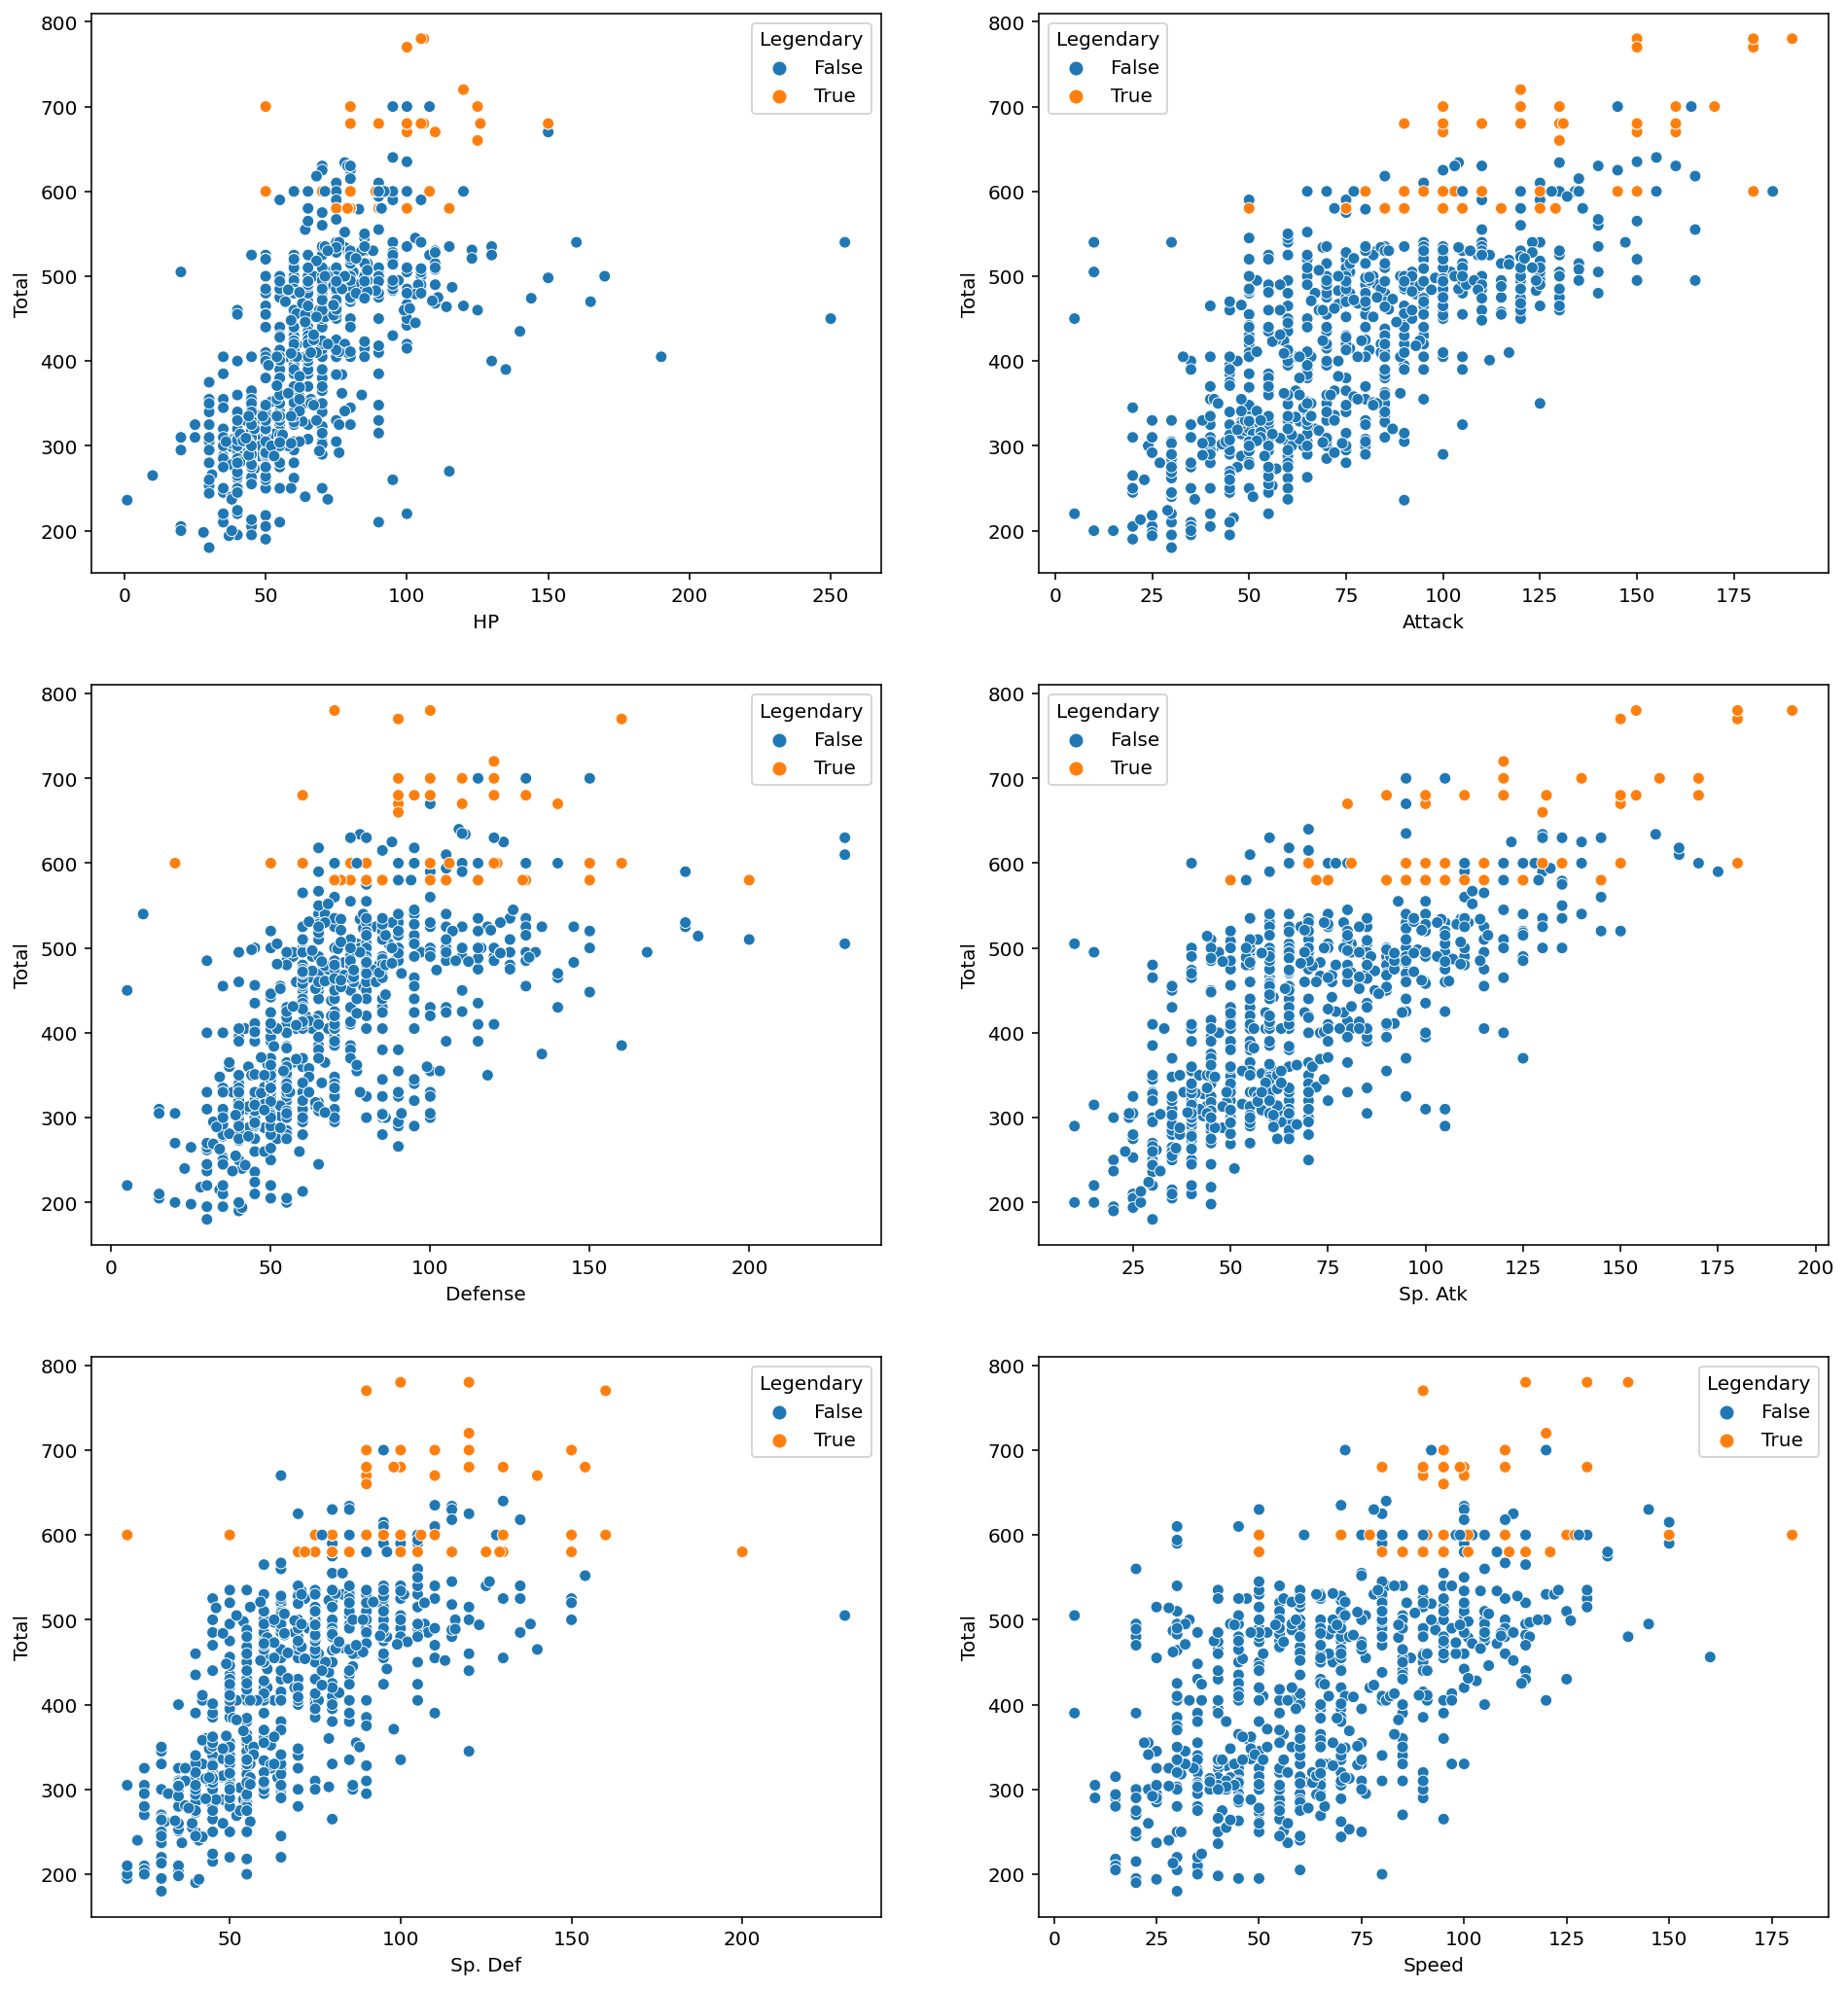

In [30]:
# 각각의 스탯에 대한 scatter plot을 6개의 subplot으로 표현합니다.

figure, ((ax1, ax2), (ax3, ax4), (ax5, ax6)) = plt.subplots(nrows=3, ncols=2)
figure.set_size_inches(16, 18)  # 화면 해상도에 따라 그래프 크기를 조정해 주세요.

# "HP" 스탯의 scatter plot
sns.scatterplot(data=pokemon, y="Total", x="HP", hue="Legendary", ax=ax1)

# "Attack" 스탯의 scatter plot
sns.scatterplot(data=pokemon, y="Total", x="Attack", hue="Legendary", ax=ax2)

# "Defense" 스탯의 scatter plot
sns.scatterplot(data=pokemon, y="Total", x="Defense", hue="Legendary", ax=ax3)

# "Sp. Atk" 스탯의 scatter plot
sns.scatterplot(data=pokemon, y="Total", x="Sp. Atk", hue="Legendary", ax=ax4)

# "Sp. Def" 스탯의 scatter plot
sns.scatterplot(data=pokemon, y="Total", x="Sp. Def", hue="Legendary", ax=ax5)

# "Speed" 스탯의 scatter plot
sns.scatterplot(data=pokemon, y="Total", x="Speed", hue="Legendary", ax=ax6)

plt.show()

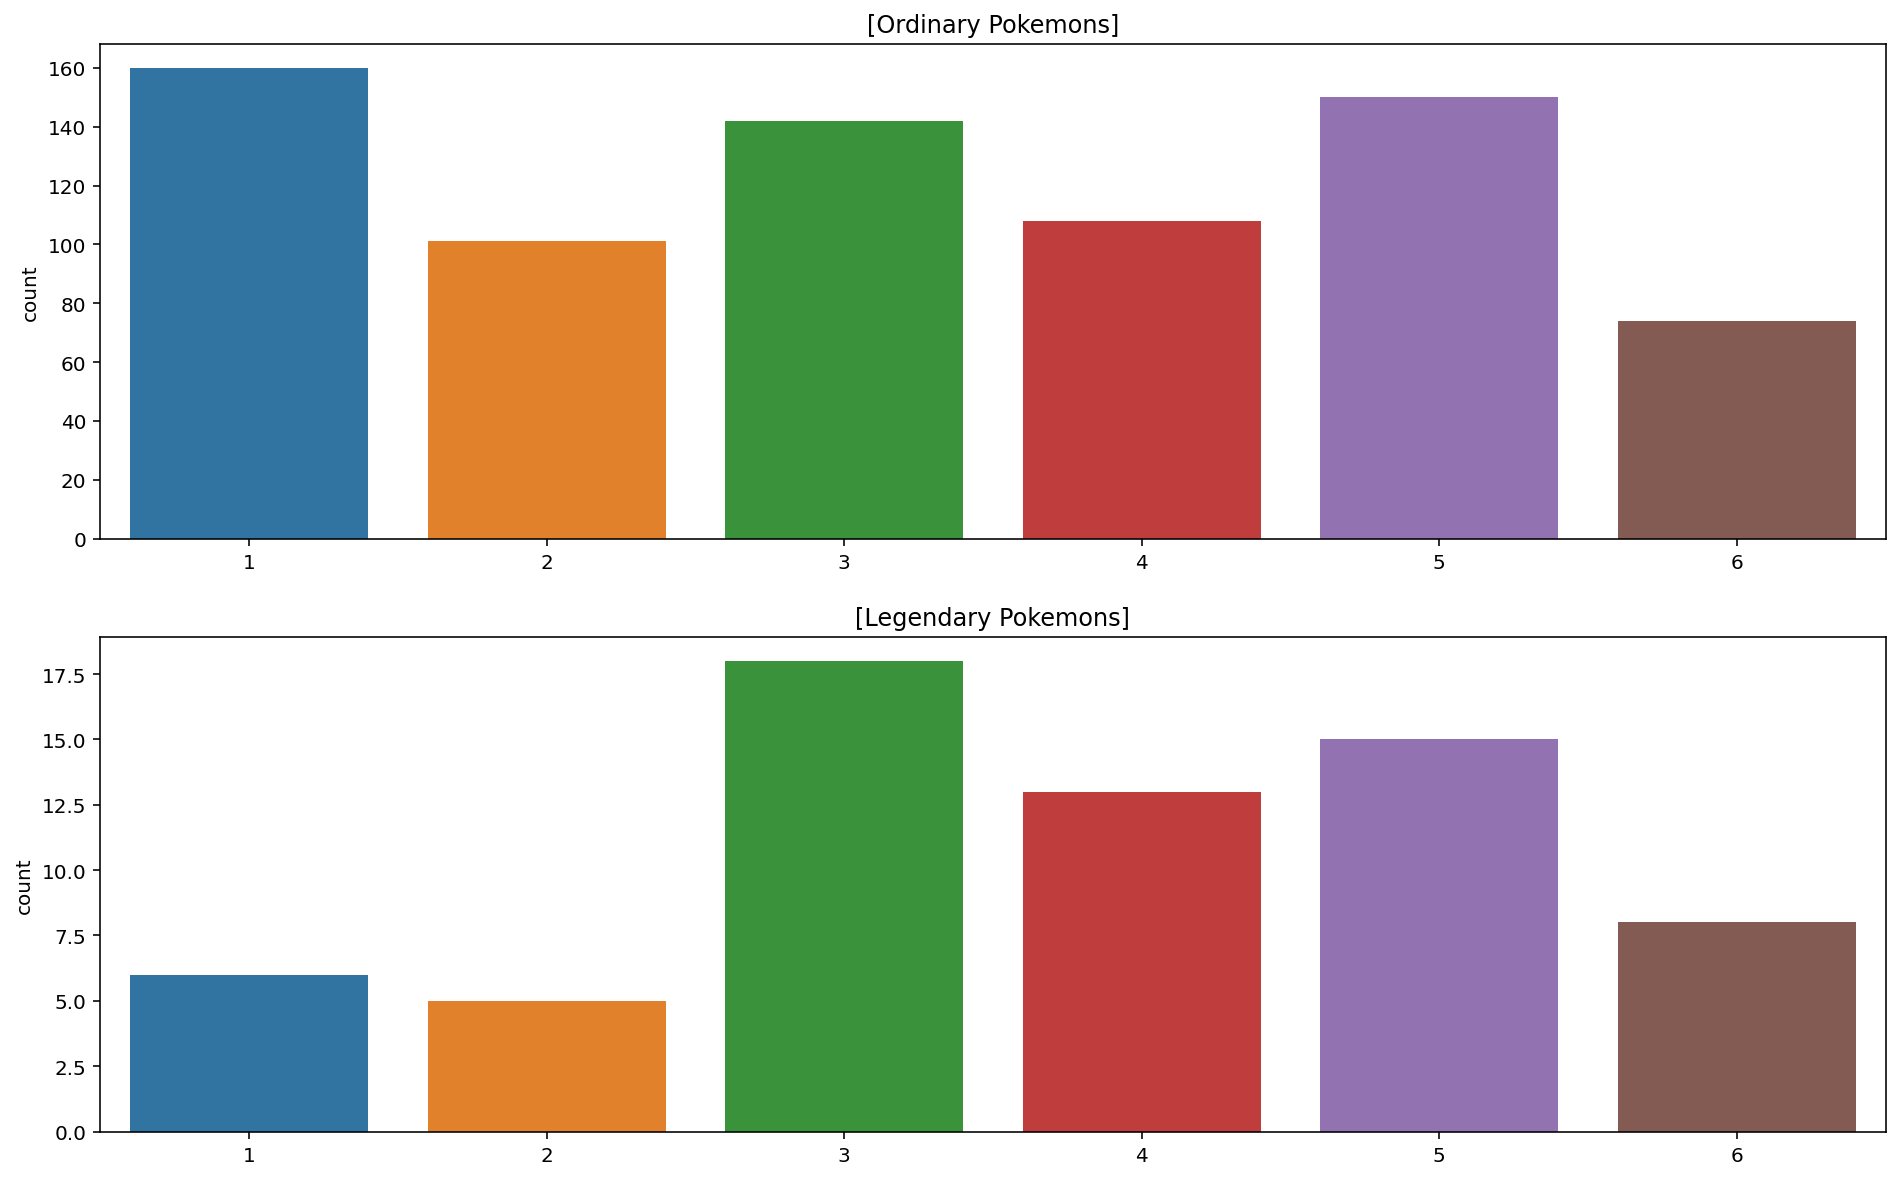

In [31]:
# 각 세대에 대한 포켓몬의 수를 확인합니다.
plt.figure(figsize=(16, 10))   # 화면 해상도에 따라 그래프 크기를 조정해 주세요.

plt.subplot(211)
sns.countplot(data=ordinary, x="Generation").set_xlabel('')
plt.title("[Ordinary Pokemons]")
plt.subplot(212)
sns.countplot(data=legendary, x="Generation").set_xlabel('')
plt.title("[Legendary Pokemons]")
plt.show()

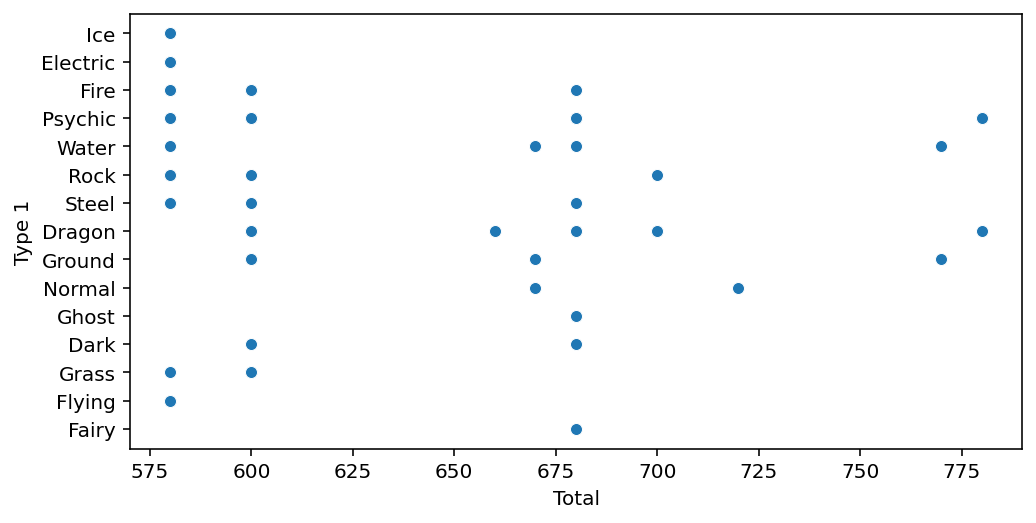

In [32]:
# 전설의 포켓몬들의 Total 값을 속성(Type 1)별로 확인해 봅시다.
fig, ax = plt.subplots()
fig.set_size_inches(8, 4)

sns.scatterplot(data=legendary, y="Type 1", x="Total")
plt.show()

In [33]:
# 전설의 포켓몬이 가지는 Total값들의 집합을 확인해 봅시다.
print(sorted(list(set(legendary["Total"]))))

[580, 600, 660, 670, 680, 700, 720, 770, 780]


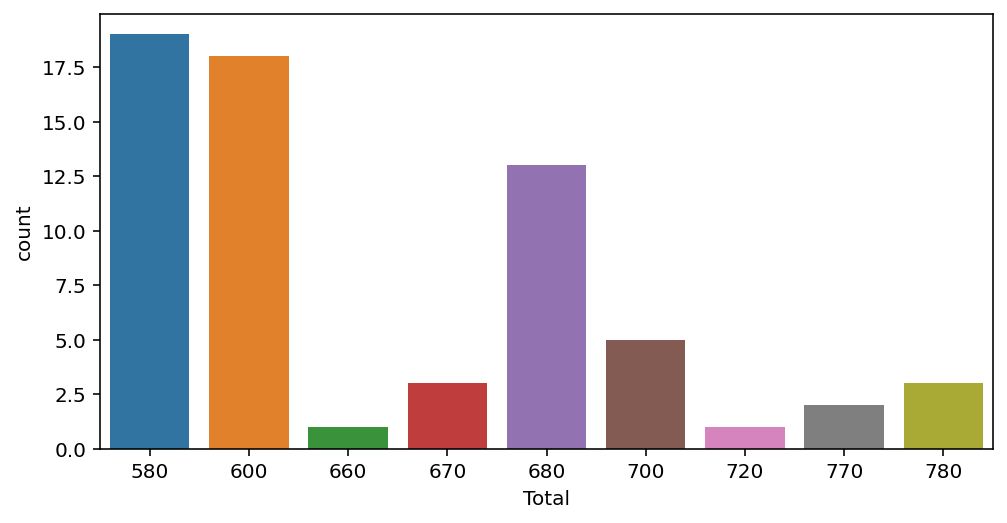

In [34]:
# 그래프로도 전설의 포켓몬이 가지는 각 Total값에 대한 포켓몬 수를 확인해 봅시다.
fig, ax = plt.subplots()
fig.set_size_inches(8, 4)

sns.countplot(data=legendary, x="Total")
plt.show()

In [35]:
# 총 65마리의 전설의 포켓몬이 9개의 Total값만 가진다는 것은,
round(65 / 9, 2)
#약 7.22마리 끼리는 같은 Total 스탯 값을 가진다는 의미와 같습니다.

7.22

In [36]:
# Q. ordinary 포켓몬의 'Total' 값 집합을 확인해봅시다.
print(sorted(list(set(ordinary["Total"]))))

[180, 190, 194, 195, 198, 200, 205, 210, 213, 215, 218, 220, 224, 236, 237, 240, 244, 245, 250, 251, 253, 255, 260, 262, 263, 264, 265, 266, 269, 270, 273, 275, 278, 280, 281, 285, 288, 289, 290, 292, 294, 295, 299, 300, 302, 303, 304, 305, 306, 307, 308, 309, 310, 313, 314, 315, 316, 318, 319, 320, 323, 325, 328, 329, 330, 334, 335, 336, 340, 341, 345, 348, 349, 350, 351, 352, 355, 358, 360, 362, 363, 365, 369, 370, 371, 375, 380, 382, 384, 385, 390, 395, 400, 401, 405, 409, 410, 411, 413, 414, 415, 418, 420, 423, 424, 425, 428, 430, 431, 435, 438, 440, 442, 445, 446, 448, 450, 452, 454, 455, 456, 458, 460, 461, 462, 464, 465, 466, 467, 468, 470, 471, 472, 473, 474, 475, 479, 480, 481, 482, 483, 484, 485, 487, 488, 489, 490, 494, 495, 497, 498, 499, 500, 505, 507, 508, 509, 510, 514, 515, 518, 519, 520, 521, 523, 525, 528, 530, 531, 534, 535, 540, 545, 550, 552, 555, 560, 565, 567, 575, 579, 580, 590, 594, 600, 610, 615, 618, 625, 630, 634, 635, 640, 670, 700]


In [37]:
# Q. 이 집합의 크기(길이)를 확인해봅시다.
print(len(sorted(list(set(ordinary["Total"])))))

195


In [38]:
# 일반 포켓몬은 총 195가지의 Total 속성값을 가지고, 전체 일반 포켓몬은 (800 - 65), 즉 735마리이므로,
round(735 / 195, 2)
# 약 3.77마리만 같은 Total 스탯 값을 가지는군요.

3.77

In [39]:
# 이로써 다음의 두 가지를 알 수 있습니다.

# Total값의 다양성은 일반 포켓몬이 전설의 포켓몬보다 두 배 가까이 됩니다. 즉 전설의 포켓몬의 Total값은 다양하지 않습니다.
# : 한 포켓몬의 Total 속성값이 전설의 포켓몬의 값들 집합에 포함되는지의 여부는 전설의 포켓몬임을 결정하는 데에 영향을 미칩니다.

# 또한, 전설의 포켓몬의 Total 값 중에는 일반 포켓몬이 가지지 못하는 Total값이 존재합니다. ex) 680, 720, 770, 780
# : Total값은 전설의 포켓몬인지 아닌지를 결정하는 데에 이러한 방식으로도 영향을 미칠 수 있습니다.

# 즉, Total값은 legendary인지 아닌지를 예측하는 데에 중요한 컬럼일 것이라는 결론을 내릴 수 있습니다.

In [40]:
# 아래 행들은 비슷한 이름을 가진 포켓몬들의 모임입니다. 이들을 pd.concat으로 합쳐보겠습니다.
n1, n2, n3, n4, n5 = legendary[3:6], legendary[14:24], legendary[25:29], legendary[46:50], legendary[52:57]
names = pd.concat([n1, n2, n3, n4, n5]).reset_index(drop=True)
names

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,150,Mewtwo,Psychic,NaN,680,106,110,90,154,90,130,1,True
1,150,MewtwoMega Mewtwo X,Psychic,Fighting,780,106,190,100,154,100,130,1,True
2,150,MewtwoMega Mewtwo Y,Psychic,NaN,780,106,150,70,194,120,140,1,True
3,380,Latias,Dragon,Psychic,600,80,80,90,110,130,110,3,True
4,380,LatiasMega Latias,Dragon,Psychic,700,80,100,120,140,150,110,3,True
5,381,Latios,Dragon,Psychic,600,80,90,80,130,110,110,3,True
6,381,LatiosMega Latios,Dragon,Psychic,700,80,130,100,160,120,110,3,True
7,382,Kyogre,Water,NaN,670,100,100,90,150,140,90,3,True
8,382,KyogrePrimal Kyogre,Water,NaN,770,100,150,90,180,160,90,3,True
9,383,Groudon,Ground,NaN,670,100,150,140,100,90,90,3,True


In [41]:
# 이름에 forme가 들어가는 여러 가지 전설의 포켓몬이 있는 경우도 존재합니다.
formes = names[13:23]
formes

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
13,386,DeoxysNormal Forme,Psychic,NaN,600,50,150,50,150,50,150,3,True
14,386,DeoxysAttack Forme,Psychic,NaN,600,50,180,20,180,20,150,3,True
15,386,DeoxysDefense Forme,Psychic,NaN,600,50,70,160,70,160,90,3,True
16,386,DeoxysSpeed Forme,Psychic,NaN,600,50,95,90,95,90,180,3,True
17,641,TornadusIncarnate Forme,Flying,NaN,580,79,115,70,125,80,111,5,True
18,641,TornadusTherian Forme,Flying,NaN,580,79,100,80,110,90,121,5,True
19,642,ThundurusIncarnate Forme,Electric,Flying,580,79,115,70,125,80,111,5,True
20,642,ThundurusTherian Forme,Electric,Flying,580,79,105,70,145,80,101,5,True
21,645,LandorusIncarnate Forme,Ground,Flying,600,89,125,90,115,80,101,5,True
22,645,LandorusTherian Forme,Ground,Flying,600,89,145,90,105,80,91,5,True


In [42]:
# 위와 비슷한 이유로, 전설의 포켓몬은 이름의 길이도 긴 경우가 많습니다.
# legendary와 ordinary 각각에 모두 "name_count"라는 이름의 길이를 나타내는 컬럼을 만들어줍니다. 
# 파이썬 람다(lambda) 기능을 사용해 행마다 이름의 길이를 구하고, 이를 "name_count" 칼럼에 넣어주었습니다.
legendary["name_count"] = legendary["Name"].apply(lambda i: len(i))    
legendary.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,name_count
0,144,Articuno,Ice,Flying,580,90,85,100,95,125,85,1,True,8
1,145,Zapdos,Electric,Flying,580,90,90,85,125,90,100,1,True,6
2,146,Moltres,Fire,Flying,580,90,100,90,125,85,90,1,True,7
3,150,Mewtwo,Psychic,NaN,680,106,110,90,154,90,130,1,True,6
4,150,MewtwoMega Mewtwo X,Psychic,Fighting,780,106,190,100,154,100,130,1,True,19


In [43]:
# Q. ordinary 포켓몬의 데이터에도 'name_count' 값을 추가해줍시다.
ordinary["name_count"] = ordinary["Name"].apply(lambda i: len(i))    
ordinary.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,name_count
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False,9
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False,7
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False,8
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False,21
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False,10


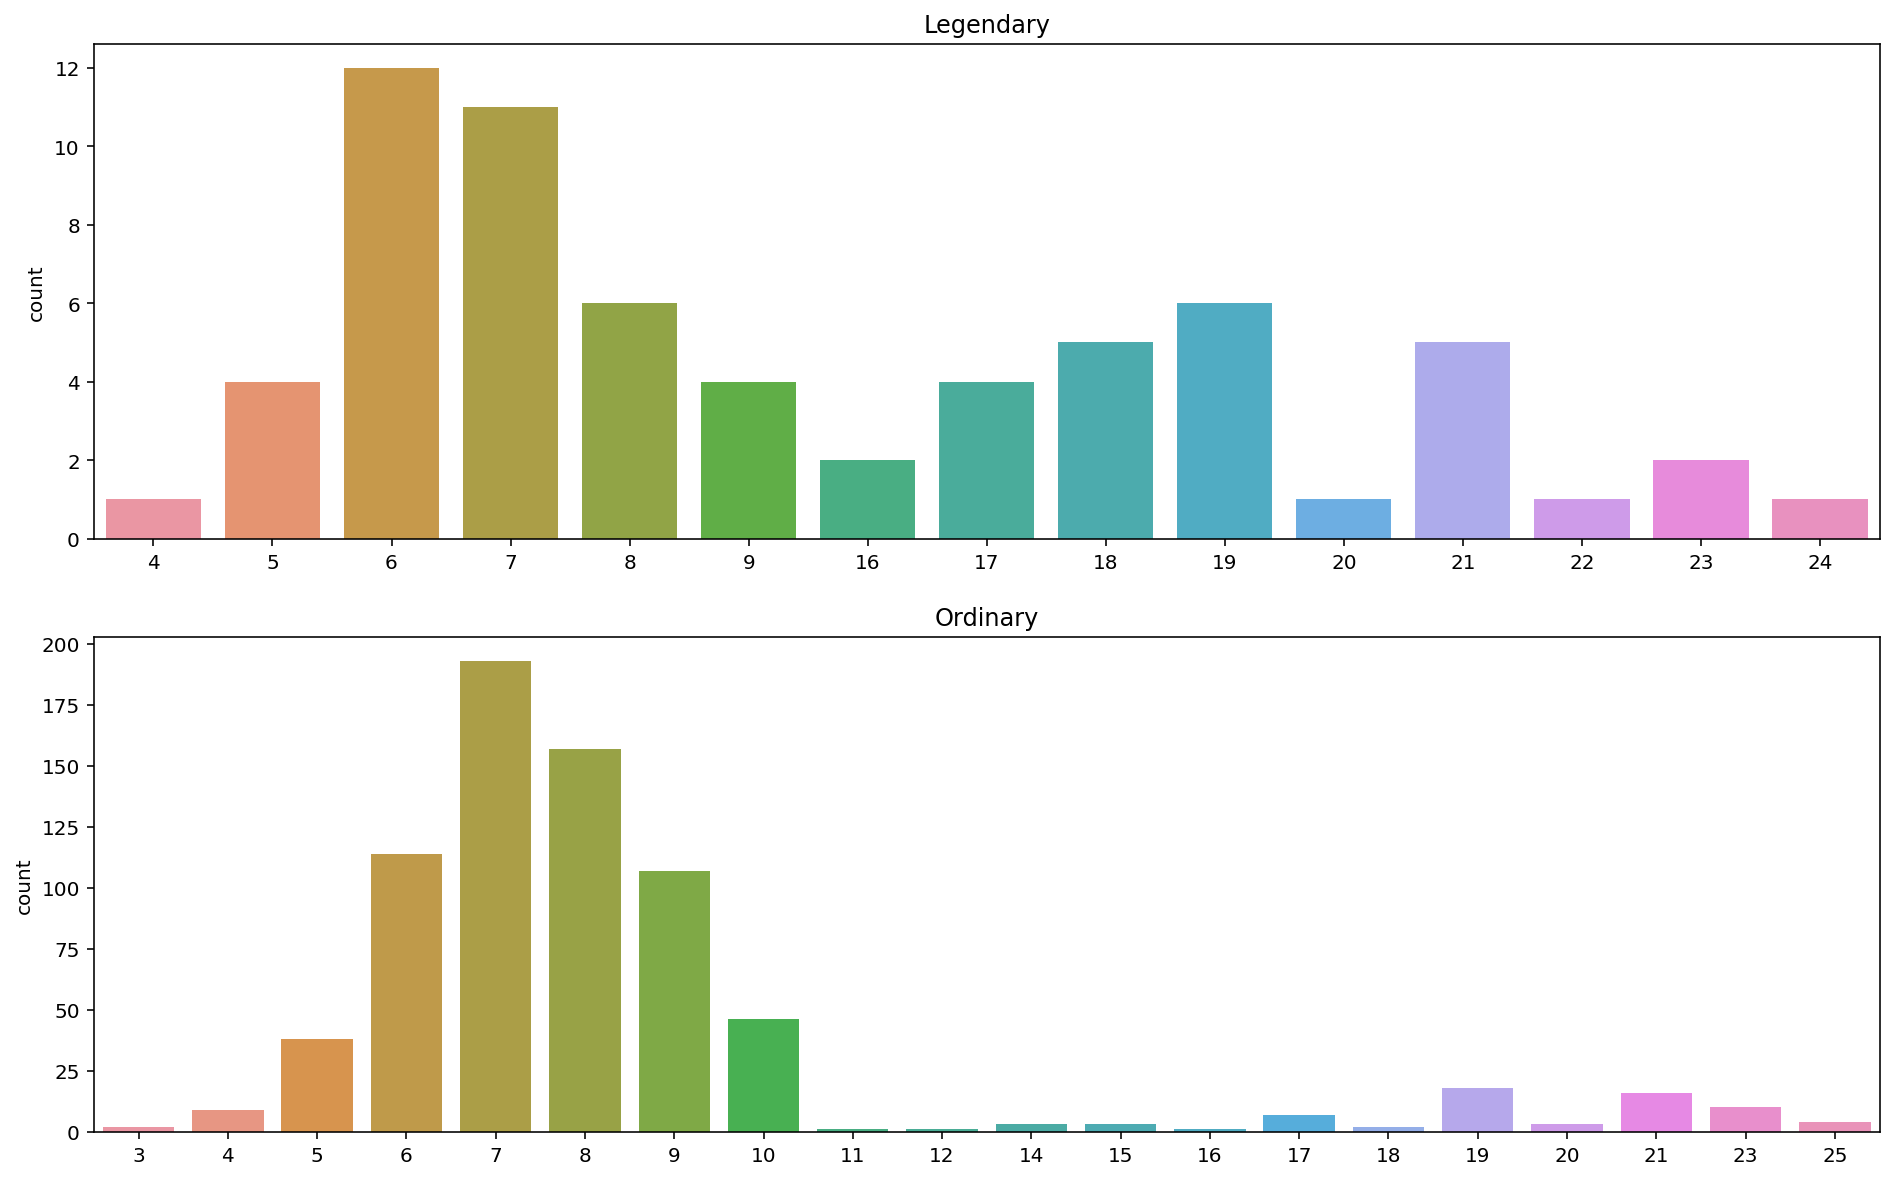

In [44]:
# 그렇다면 이 name_count 컬럼은 어떤 특징을 갖게 될까요? 그래프로 확인해 봅니다.
plt.figure(figsize=(16, 10))   # 화면 해상도에 따라 그래프 크기를 조정해 주세요.

plt.subplot(211)
sns.countplot(data=legendary, x="name_count").set_xlabel('')
plt.title("Legendary")
plt.subplot(212)
sns.countplot(data=ordinary, x="name_count").set_xlabel('')
plt.title("Ordinary")
plt.show()

In [45]:
# 전설의 포켓몬의 이름이 10 이상일 확률은 어느 정도일까요?
print(round(len(legendary[legendary["name_count"] > 9]) / len(legendary) * 100, 2), "%")

41.54 %


In [46]:
# Q. 일반 포켓몬의 이름이 10글자 이상일 확률을 구해보세요.
print(round(len(ordinary[ordinary["name_count"] > 9]) / len(ordinary) * 100, 2), "%")

15.65 %


In [47]:
# 위의 두 가지, 이름에 대한 분석은 중요한 시사점을 가집니다.

# 만약 "Latios"가 전설의 포켓몬이라면, "%%% Latios" 또한 전설의 포켓몬이다!
# 적어도 전설의 포켓몬에서 높은 빈도를 보이는 이름들의 모임이 존재한다!
# 전설의 포켓몬은 긴 이름을 가졌을 확률이 높다!

In [48]:
# 이름의 길이를 확인할 수 있는 name_count 컬럼을 생성합니다.
# 이번엔 전체 데이터가 있는 pokemon 데이터 프레임에 생성합니다.

pokemon["name_count"] = pokemon["Name"].apply(lambda i: len(i))
pokemon.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,Stats_Sum_Equal_Total,name_count
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False,1,9
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False,1,7
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False,1,8
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False,1,21
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False,1,10


In [49]:
# 이름의 길이가 10 이상이면 True, 미만이면 False를 가지는 long_name 컬럼을 생성합니다.
pokemon["long_name"] = pokemon["name_count"] >= 10
pokemon.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,Stats_Sum_Equal_Total,name_count,long_name
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False,1,9,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False,1,7,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False,1,8,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False,1,21,True
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False,1,10,True


In [50]:
# 이름에 알파벳이 아닌 문자가 들어간 경우 전처리하기
# 알파벳 체크를 위해 띄어쓰기가 없는 컬럼을 따로 만들어준 후, 띄어쓰기를 빈칸으로 처리해서 확인하도록 하겠습니다.
pokemon["Name_nospace"] = pokemon["Name"].apply(lambda i: i.replace(" ", ""))
pokemon.tail()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,Stats_Sum_Equal_Total,name_count,long_name,Name_nospace
795,719,Diancie,Rock,Fairy,600,50,100,150,100,150,50,6,True,1,7,False,Diancie
796,719,DiancieMega Diancie,Rock,Fairy,700,50,160,110,160,110,110,6,True,1,19,True,DiancieMegaDiancie
797,720,HoopaHoopa Confined,Psychic,Ghost,600,80,110,60,150,130,70,6,True,1,19,True,HoopaHoopaConfined
798,720,HoopaHoopa Unbound,Psychic,Dark,680,80,160,60,170,130,80,6,True,1,18,True,HoopaHoopaUnbound
799,721,Volcanion,Fire,Water,600,80,110,120,130,90,70,6,True,1,9,False,Volcanion


In [51]:
# isalpha() 함수를 이용해 이름이 알파벳으로만 이루어졌는지 확인해 봅시다.

pokemon["name_isalpha"] = pokemon["Name_nospace"].apply(lambda i: i.isalpha())
pokemon.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,Stats_Sum_Equal_Total,name_count,long_name,Name_nospace,name_isalpha
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False,1,9,False,Bulbasaur,True
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False,1,7,False,Ivysaur,True
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False,1,8,False,Venusaur,True
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False,1,21,True,VenusaurMegaVenusaur,True
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False,1,10,True,Charmander,True


In [52]:
#  알파벳이 아닌 다른 문자가 이름에 포함된 것은 어떤 것들이 있을까요?
print(pokemon[pokemon["name_isalpha"] == False].shape)
pokemon[pokemon["name_isalpha"] == False]

(9, 18)


,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,Stats_Sum_Equal_Total,name_count,long_name,Name_nospace,name_isalpha
34,29,Nidoran♀,Poison,NaN,275,55,47,52,40,40,41,1,False,1,8,False,Nidoran♀,False
37,32,Nidoran♂,Poison,NaN,273,46,57,40,40,40,50,1,False,1,8,False,Nidoran♂,False
90,83,Farfetch'd,Normal,Flying,352,52,65,55,58,62,60,1,False,1,10,True,Farfetch'd,False
131,122,Mr. Mime,Psychic,Fairy,460,40,45,65,100,120,90,1,False,1,8,False,Mr.Mime,False
252,233,Porygon2,Normal,NaN,515,85,80,90,105,95,60,2,False,1,8,False,Porygon2,False
270,250,Ho-oh,Fire,Flying,680,106,130,90,110,154,90,2,True,1,5,False,Ho-oh,False
487,439,Mime Jr.,Psychic,Fairy,310,20,25,45,70,90,60,4,False,1,8,False,MimeJr.,False
525,474,Porygon-Z,Normal,NaN,535,85,80,70,135,75,90,4,False,1,9,False,Porygon-Z,False
794,718,Zygarde50% Forme,Dragon,Ground,600,108,100,121,81,95,95,6,True,1,16,True,Zygarde50%Forme,False


In [53]:
# 직접 이름을 바꿔줍니다.
pokemon = pokemon.replace(to_replace="Nidoran♀", value="Nidoran X")
pokemon = pokemon.replace(to_replace="Nidoran♂", value="Nidoran Y")
pokemon = pokemon.replace(to_replace="Farfetch'd", value="Farfetchd")
pokemon = pokemon.replace(to_replace="Mr. Mime", value="Mr Mime")
pokemon = pokemon.replace(to_replace="Porygon2", value="Porygon Two")
pokemon = pokemon.replace(to_replace="Ho-oh", value="Ho Oh")
pokemon = pokemon.replace(to_replace="Mime Jr.", value="Mime Jr")
pokemon = pokemon.replace(to_replace="Porygon-Z", value="Porygon Z")
pokemon = pokemon.replace(to_replace="Zygarde50% Forme", value="Zygarde Forme")

pokemon.loc[[34, 37, 90, 131, 252, 270, 487, 525, 794]]

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,Stats_Sum_Equal_Total,name_count,long_name,Name_nospace,name_isalpha
34,29,Nidoran X,Poison,NaN,275,55,47,52,40,40,41,1,False,1,8,False,Nidoran X,False
37,32,Nidoran Y,Poison,NaN,273,46,57,40,40,40,50,1,False,1,8,False,Nidoran Y,False
90,83,Farfetchd,Normal,Flying,352,52,65,55,58,62,60,1,False,1,10,True,Farfetchd,False
131,122,Mr Mime,Psychic,Fairy,460,40,45,65,100,120,90,1,False,1,8,False,Mr.Mime,False
252,233,Porygon Two,Normal,NaN,515,85,80,90,105,95,60,2,False,1,8,False,Porygon Two,False
270,250,Ho Oh,Fire,Flying,680,106,130,90,110,154,90,2,True,1,5,False,Ho Oh,False
487,439,Mime Jr,Psychic,Fairy,310,20,25,45,70,90,60,4,False,1,8,False,MimeJr.,False
525,474,Porygon Z,Normal,NaN,535,85,80,70,135,75,90,4,False,1,9,False,Porygon Z,False
794,718,Zygarde Forme,Dragon,Ground,600,108,100,121,81,95,95,6,True,1,16,True,Zygarde50%Forme,False


In [54]:
# 다시 isalpha로 확인해 볼까요?
# Q. 바꿔준 'Name' 컬럼으로 'Name_nospace'를 만들고, 다시 isalpha()로 체크해봅시다.
pokemon["Name_nospace"] = pokemon["Name"].apply(lambda i: i.replace(" ", ""))
pokemon["name_isalpha"] = pokemon["Name_nospace"].apply(lambda i: i.isalpha())
pokemon[pokemon["name_isalpha"] == False]

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,Stats_Sum_Equal_Total,name_count,long_name,Name_nospace,name_isalpha


In [55]:
# 정규식 re 패키지를 사용해 봅시다.

import re

In [56]:
# 우리가 원하는 것은 CharizardMega Charizard X와 같은 이름을 적절히 쪼개서 리스트로 만드는 것입니다.
# 이름을 공백을 기준으로 쪼개보겠습니다. 
name = "CharizardMega Charizard X"
name_split = name.split(" ")
name_split

['CharizardMega', 'Charizard', 'X']

In [57]:
# 하지만 여기서 한 가지 더 해야 하는 일은 맨 처음 요소인 CharizardMega 를 Charizard와 Mega로 나누는 것입니다.
# name_split 리스트 안에 있는 첫 번째 요소를 쪼개고 싶으므로 temp에 저장하겠습니다.
temp = name_split[0]
temp

'CharizardMega'

In [58]:
# 이 붙어있는 이름을 우리는 대문자로 시작해서 소문자로 끝나는 토큰들로 분리하고 싶습니다.
# 패턴을 찾는 것은 앞서 import 한 re 패키지의 findall 함수를 이용해서 실행할 수 있습니다.
tokens = re.findall('[A-Z][a-z]*', temp)
tokens

['Charizard', 'Mega']

In [59]:
# 지금까지 한 과정을 반복문으로 합치면 한 개의 이름을 이루고 있는 모든 토큰을 tokens에 모아둘 수 있습니다.
tokens = []
for part_name in name_split:
    a = re.findall('[A-Z][a-z]*', part_name)
    tokens.extend(a)
tokens

['Charizard', 'Mega', 'Charizard', 'X']

In [60]:
# 지금까지 진행한 토큰화 과정을 모든 이름에 적용시킬 수 있도록 함수를 만들어서 전체 데이터셋에 적용하겠습니다.
def tokenize(name):
    name_split = name.split(" ")
    tokens = []
    for part_name in name_split:
        a = re.findall('[A-Z][a-z]*', part_name)
        tokens.extend(a)
    return np.array(tokens)

name = "CharizardMega Charizard X"
tokenize(name)

array(['Charizard', 'Mega', 'Charizard', 'X'], dtype='<U9')

In [61]:
# 이를 이제 전설의 포켓몬 데이터셋에 적용시켜서, 전설의 포켓몬의 이름에 사용된 토큰을 모아보겠습니다.
all_tokens = list(legendary["Name"].apply(tokenize).values)

token_set = []
for token in all_tokens:
    token_set.extend(token)

print(len(set(token_set)))
print(token_set)

65
['Articuno', 'Zapdos', 'Moltres', 'Mewtwo', 'Mewtwo', 'Mega', 'Mewtwo', 'X', 'Mewtwo', 'Mega', 'Mewtwo', 'Y', 'Raikou', 'Entei', 'Suicune', 'Lugia', 'Ho', 'Regirock', 'Regice', 'Registeel', 'Latias', 'Latias', 'Mega', 'Latias', 'Latios', 'Latios', 'Mega', 'Latios', 'Kyogre', 'Kyogre', 'Primal', 'Kyogre', 'Groudon', 'Groudon', 'Primal', 'Groudon', 'Rayquaza', 'Rayquaza', 'Mega', 'Rayquaza', 'Jirachi', 'Deoxys', 'Normal', 'Forme', 'Deoxys', 'Attack', 'Forme', 'Deoxys', 'Defense', 'Forme', 'Deoxys', 'Speed', 'Forme', 'Uxie', 'Mesprit', 'Azelf', 'Dialga', 'Palkia', 'Heatran', 'Regigigas', 'Giratina', 'Altered', 'Forme', 'Giratina', 'Origin', 'Forme', 'Darkrai', 'Shaymin', 'Land', 'Forme', 'Shaymin', 'Sky', 'Forme', 'Arceus', 'Victini', 'Cobalion', 'Terrakion', 'Virizion', 'Tornadus', 'Incarnate', 'Forme', 'Tornadus', 'Therian', 'Forme', 'Thundurus', 'Incarnate', 'Forme', 'Thundurus', 'Therian', 'Forme', 'Reshiram', 'Zekrom', 'Landorus', 'Incarnate', 'Forme', 'Landorus', 'Therian', 'Form

In [62]:
# collections 모듈에 있는 Counter를 가져옵니다.
from collections import Counter

In [63]:
# Counter 객체는 다음과 같이 각 요소가 몇 개인지를 담은 튜플 리스트를 반환합니다.
a = [1, 1, 0, 0, 0, 1, 1, 2, 3]
Counter(a)

Counter({1: 4, 0: 3, 2: 1, 3: 1})

In [64]:
# most_common을 활용하면 가장 많은 요소와 등장 횟수가 무엇인지를 정렬해 주기도 하죠.
Counter(a).most_common()

[(1, 4), (0, 3), (2, 1), (3, 1)]

In [65]:
# 이를 활용해서 우리의 token_set에는 어떤 토큰이 가장 많이 쓰였는지 찾아보겠습니다.
# most_common() 함수에 인자로 숫자를 넣어주면 원하는 개수만큼만 출력할 수 있습니다.
# 10개만 추려보겠습니다.
most_common = Counter(token_set).most_common(10)
most_common

[('Forme', 15),
 ('Mega', 6),
 ('Mewtwo', 5),
 ('Kyurem', 5),
 ('Deoxys', 4),
 ('Hoopa', 4),
 ('Latias', 3),
 ('Latios', 3),
 ('Kyogre', 3),
 ('Groudon', 3)]

In [66]:
# 전설의 포켓몬 이름에 등장하는 토큰이 포켓몬의 이름에 있는지의 여부를 나타내는 컬럼을 만들겠습니다.
for token, _ in most_common:
    # pokemon[token] = ... 형식으로 사용하면 뒤에서 warning이 발생합니다
    pokemon[f"{token}"] = pokemon["Name"].str.contains(token)

pokemon.head(10)

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,...,Forme,Mega,Mewtwo,Kyurem,Deoxys,Hoopa,Latias,Latios,Kyogre,Groudon
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,...,False,False,False,False,False,False,False,False,False,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,...,False,False,False,False,False,False,False,False,False,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,...,False,False,False,False,False,False,False,False,False,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,...,False,True,False,False,False,False,False,False,False,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,...,False,False,False,False,False,False,False,False,False,False
5,5,Charmeleon,Fire,NaN,405,58,64,58,80,65,...,False,False,False,False,False,False,False,False,False,False
6,6,Charizard,Fire,Flying,534,78,84,78,109,85,...,False,False,False,False,False,False,False,False,False,False
7,6,CharizardMega Charizard X,Fire,Dragon,634,78,130,111,130,85,...,False,True,False,False,False,False,False,False,False,False
8,6,CharizardMega Charizard Y,Fire,Flying,634,78,104,78,159,115,...,False,True,False,False,False,False,False,False,False,False
9,7,Squirtle,Water,NaN,314,44,48,65,50,64,...,False,False,False,False,False,False,False,False,False,False


In [67]:
# EDA 단계에서 만들었던 모든 Type의 리스트를 다시 가져와보겠습니다.
print(types)

['Rock', 'Electric', 'Flying', 'Dragon', 'Dark', 'Steel', 'Normal', 'Fighting', 'Psychic', 'Ghost', 'Poison', 'Ground', 'Water', 'Grass', 'Ice', 'Bug', 'Fire', 'Fairy']


In [68]:
# 이 18개의 컬럼에 대해 원-핫 인코딩을 해주는 작업은 다음과 같이 할 수 있습니다.
for t in types:
    pokemon[t] = (pokemon["Type 1"] == t) | (pokemon["Type 2"] == t)
    
pokemon[[["Type 1", "Type 2"] + types][0]].head()

,Type 1,Type 2,Rock,Electric,Flying,Dragon,Dark,Steel,Normal,Fighting,Psychic,Ghost,Poison,Ground,Water,Grass,Ice,Bug,Fire,Fairy
0,Grass,Poison,False,False,False,False,False,False,False,False,False,False,True,False,False,True,False,False,False,False
1,Grass,Poison,False,False,False,False,False,False,False,False,False,False,True,False,False,True,False,False,False,False
2,Grass,Poison,False,False,False,False,False,False,False,False,False,False,True,False,False,True,False,False,False,False
3,Grass,Poison,False,False,False,False,False,False,False,False,False,False,True,False,False,True,False,False,False,False
4,Fire,NaN,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False


In [69]:
# 가장 기본으로 처음부터 있었던 컬럼들만 사용해서 베이스라인(Baseline) 모델을 만들어보겠습니다.
# 원본 데이터를 불러옵니다.
print(original_data.shape)
original_data.head()

(800, 13)


,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


In [70]:
#컬럼을 확인합니다.
original_data.columns

Index(['#', 'Name', 'Type 1', 'Type 2', 'Total', 'HP', 'Attack', 'Defense',
       'Sp. Atk', 'Sp. Def', 'Speed', 'Generation', 'Legendary'],
      dtype='object')

In [71]:
# 다음 컬럼 중 의미 없는 컬럼인 #와 문자열 데이터인 Name, Type 1, Type 2 데이터는 제외하고 사용해 보겠습니다.
# 그리고 target 데이터인 Legendary 또한 변수에 저장해 주겠습니다.
features = ['Total', 'HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed', 'Generation']
target = 'Legendary'

In [72]:
# Q. 'original_data'에서 'features' 컬럼에 해당하는 데이터를 변수 'X'에 저장합니다.
X = original_data[features]
print(X.shape)
X.head()

(800, 8)


,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation
0,318,45,49,49,65,65,45,1
1,405,60,62,63,80,80,60,1
2,525,80,82,83,100,100,80,1
3,625,80,100,123,122,120,80,1
4,309,39,52,43,60,50,65,1


In [73]:
# Q. 'target' 컬럼의 데이터를 변수 'y'에 저장합니다.
y = original_data[target]
print(y.shape)
y.head()

(800,)


0    False
1    False
2    False
3    False
4    False
Name: Legendary, dtype: bool

In [74]:
# 데이터 분리
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=15)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(640, 8) (640,)
(160, 8) (160,)


In [75]:
#의사결정나무 사용
from sklearn.tree import DecisionTreeClassifier
print('슝=3')

슝=3


In [76]:
#random_state값 정의
model = DecisionTreeClassifier(random_state=25)
model

DecisionTreeClassifier(random_state=25)

In [77]:
# model 학습, 예측
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print('슝=3')

슝=3


In [78]:
#채점
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)

array([[144,   3],
       [  5,   8]])

In [79]:
# 전설의 포켓몬 수
len(legendary)

65

In [80]:
# classification_report를 활용해서 다른 값들도 확인
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       False       0.97      0.98      0.97       147
        True       0.73      0.62      0.67        13

    accuracy                           0.95       160
   macro avg       0.85      0.80      0.82       160
weighted avg       0.95      0.95      0.95       160



In [81]:
# 처리한 모든 컬럼 확인
print(len(pokemon.columns))
print(pokemon.columns)

46
Index(['#', 'Name', 'Type 1', 'Type 2', 'Total', 'HP', 'Attack', 'Defense',
       'Sp. Atk', 'Sp. Def', 'Speed', 'Generation', 'Legendary',
       'Stats_Sum_Equal_Total', 'name_count', 'long_name', 'Name_nospace',
       'name_isalpha', 'Forme', 'Mega', 'Mewtwo', 'Kyurem', 'Deoxys', 'Hoopa',
       'Latias', 'Latios', 'Kyogre', 'Groudon', 'Rock', 'Electric', 'Flying',
       'Dragon', 'Dark', 'Steel', 'Normal', 'Fighting', 'Psychic', 'Ghost',
       'Poison', 'Ground', 'Water', 'Grass', 'Ice', 'Bug', 'Fire', 'Fairy'],
      dtype='object')


In [84]:
# 몇 가지 컬럼을 제외하고 모델 학습에 사용할 컬럼들만 추려서 features라는 변수에 저장하겠습니다.
features = ['Total', 'HP', 'Attack', 'Defense','Sp. Atk', 'Sp. Def', 'Speed', 'Generation', 
            'name_count','long_name', 'Forme', 'Mega', 'Mewtwo','Deoxys', 'Kyurem', 'Latias', 'Latios',
            'Kyogre', 'Groudon', 'Hoopa','Poison', 'Ground', 'Flying', 'Normal', 'Water', 'Fire',
            'Electric','Rock', 'Dark', 'Fairy', 'Steel', 'Ghost', 'Psychic', 'Ice', 'Bug', 'Grass', 'Dragon', 'Fighting']

len(features)

38

In [85]:
# 전설의 포켓몬인지 아닌지의 여부를 나타내는 Legendary를 target 변수에 저장하겠습니다.
target = "Legendary"
target

'Legendary'

In [90]:
# Q. 사용할 feature에 해당하는 데이터를 'X' 변수에 저장합니다.
X = pokemon[features]
print(X.shape)
X.head()

(800, 38)


,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,name_count,long_name,...,Dark,Fairy,Steel,Ghost,Psychic,Ice,Bug,Grass,Dragon,Fighting
0,318,45,49,49,65,65,45,1,9,False,...,False,False,False,False,False,False,False,True,False,False
1,405,60,62,63,80,80,60,1,7,False,...,False,False,False,False,False,False,False,True,False,False
2,525,80,82,83,100,100,80,1,8,False,...,False,False,False,False,False,False,False,True,False,False
3,625,80,100,123,122,120,80,1,21,True,...,False,False,False,False,False,False,False,True,False,False
4,309,39,52,43,60,50,65,1,10,True,...,False,False,False,False,False,False,False,False,False,False


In [91]:
# Q. 정답 데이터 'y'도 'target' 변수를 이용해 만들어줍시다.
y = pokemon[target]
print(y.shape)
y.head()

(800,)


0    False
1    False
2    False
3    False
4    False
Name: Legendary, dtype: bool

In [92]:
# X_train 부터 y_test까지로 분리해 주도록 하겠습니다.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=15)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(640, 38) (640,)
(160, 38) (160,)


In [93]:
# 의사 결정 트리를 활용해서 학습시킨 후 결과를 비교해 보겠습니다.
model = DecisionTreeClassifier(random_state=25)
model

DecisionTreeClassifier(random_state=25)

In [94]:
# Q. train 데이터로 decision tree 모델을 학습시키고
# test 데이터로 모델의 예측 값을 얻어봅시다!
model.fit(X_train, y_train)
pred=model.predict(X_test)
pred

array([ True, False,  True, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False,  True,
       False, False, False, False, False, False, False, False, False,
       False, False, False,  True, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False,  True, False, False,
       False, False, False, False,  True, False, False, False, False,
       False, False, False,  True, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False,  True, False, False, False, False,
        True, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False,  True,
       False, False, False,  True,  True, False,  True, False, False,
        True, False,

In [95]:
# Q. confusion matrix를 확인해보세요.
cm = confusion_matrix(y_test, pred)
print(cm)

[[141   6]
 [  1  12]]


In [96]:
# Q. classification report도 확인해봅시다!
report = classification_report(y_test, pred)
print(report)

              precision    recall  f1-score   support

       False       0.99      0.96      0.98       147
        True       0.67      0.92      0.77        13

    accuracy                           0.96       160
   macro avg       0.83      0.94      0.87       160
weighted avg       0.97      0.96      0.96       160



In [97]:
# 위에서 약 0.62에 그쳤던 recall값이 무려 0.92로까지 올랐습니다!!